In [27]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder  # scikit-learn (sklearn) kütüphanesinde bulunan bir sınıftır ve kategorik (sayısal olmayan) etiketleri sayısal etiketlere dönüştürmek için kullanılır.( sınıf sayısını belirlemek için kulnılır) 

In [28]:
veri=pd.read_csv("/Users/abdulbarisoylemez/Documents/Visual Code/YapayZekaDersi/3.hfta/archive/train.csv")
veri

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [29]:
## Sınıf sayısını belirleme 

In [31]:
label_encoder=LabelEncoder().fit(veri.price_range)  
#LabelEncoder oluşturuldu ve "price_range" özelliğini bu encoder'a uyduruldu. Bu işlem, "price_range" özelliğindeki farklı kategorik değerleri sayısal değerlere dönüştüren bir eşleme öğrenir.
labels=label_encoder.transform(veri.price_range)
#"price_range" özelliği içindeki kategorik değerler, öğrenilen eşlemeye göre sayısal değerlere dönüştürülür.
calsses=list(label_encoder.classes_)
#list(label_encoder.classes_) ifadesi, dönüşüm sırasında kullanılan sayısal değerlerin sırasıyla hangi kategorik değerlere karşılık geldiğini içeren bir liste döndürür.
print(calsses)

[0, 1, 2, 3]


In [32]:
### Girdi ve çıktı değerlerinin belirlenmesi 

In [33]:
X=veri.drop(["price_range"],axis=1)
Y=labels  # sayısal olan kategorik değerleri yani öbür adı ile etiketli veriyi atıyoruz 

In [8]:
### Verilerin standartlaştırılması

In [34]:
from sklearn.preprocessing import StandardScaler # StandardScaler, verilerinizi standartlaştırmak için kullanılır. Standartlaştırma, verilerin ortalama değeri 0 ve standart sapması 1 olacak şekilde dönüştürülmesini içerir.

sc=StandardScaler()
x=sc.fit_transform(X) # fit_transform yöntemi, verilerinizi önce veriye uyarlar (ortalamayı ve standart sapmayı hesaplar) ve ardından bu verilere standartlaştırma işlemini uygular. 

In [35]:
### Eğitim ve test verilerin hazırlanması

In [36]:
from sklearn.model_selection import train_test_split
## Verilerinizi eğitim ve test veri kümelerine bölmek için train_test_split fonksiyonunu kullanın
# X, özellikleri temsil ederken, Y hedef değişkeni temsil eder
x_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.2)
# - X_train, eğitim verilerini temsil eder (özellikler)
# - X_test, test verilerini temsil eder (özellikler)
# - Y_train, eğitim verilerinin hedef değişken değerlerini temsil eder
# - Y_test, test verilerinin hedef değişken değerlerini temsil eder

In [12]:
### Çıktı değerlerin katagorize edilmesi 

In [37]:
from tensorflow.keras.utils import to_categorical
#Bu satır,TensorFlow ve Keras kütüphanelerinden "to_categorical" işlevini içe aktarır. to_categorical, kategorik (one-hot) kodlama yapmak için kullanılır.
Y_train=to_categorical(Y_train) # veriyi binary yapıya çeviriri
# Bu satırda, eğitim veri setindeki hedef değişkenleri (Y_train) kategorik (one-hot) kodlamaya dönüştürür. Kategorik kodlama, çok sınıflı sınıflandırma problemleri için kullanılır ve her sınıfı temsil eden bir sütun oluşturur. Her veri örneği yalnızca ilgili sınıfın sütununda 1 ile temsil edilir ve diğer sütunlarda 0 ile temsil edilir. Bu, bir sınıfın diğer sınıflarla karşılaştırılabilir hale gelmesini sağlar.
Y_test=to_categorical(Y_test) # veriyi binary yapıya çevirir
# Bu satırda, test veri setindeki hedef değişkenleri (Y_test) de aynı şekilde kategorik (one-hot) kodlamaya dönüştürülür. Bu, test verisi için aynı kodlama yaklaşımını uygular ve böylece test işleminde kullanılabilir.


In [38]:
# Model oluşturmaya geçelim 

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
#model = Sequential() satırıyla bir Sequential modeli oluşturulur. Sequential model, katmanları ardışık olarak eklemenize ve bir sinir ağı modelini basit bir şekilde oluşturmanıza olanak tanır.
model.add(Dense(16, input_dim=20, activation="relu"))
# satırıyla giriş katmanı eklenir. Bu katman 20 giriş özelliğini alır (input_dim=20) ve 16 nöron içerir. 
# Aktivasyon fonksiyonu olarak "relu" (Rectified Linear Activation) kullanılır. Bu katman, giriş verilerini işler ve ardışık katmanlara iletecektir.
model.add(Dense(16, activation="relu"))
#model.add(Dense(12, activation="relu") satırıyla bir gizli katman eklenir. Bu katman, 12 nöron içerir ve yine "relu" aktivasyon fonksiyonunu kullanır.
#Gizli katmanlar, modelin veri özelliklerini öğrenmesi için kullanılır.
model.add(Dense(4, activation="softmax"))
#satırıyla çıkış katmanı eklenir. Bu katman, 4 nöron içerir ve "softmax" aktivasyon fonksiyonunu kullanır. "Softmax" fonksiyonu, çok sınıflı sınıflandırma problemleri için kullanılır ve her sınıf için olasılık değerlerini üretir. 
#Yani, bu katman, modelin girdiyi farklı sınıflara tahmin etmesini sağlar.
model.summary()
#komutu, oluşturulan modelin özetini görüntüler. Bu özet, her katmandaki nöron sayısı, aktivasyon fonksiyonları ve toplam parametre sayısı gibi bilgileri içerir.




Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 16)                336       
                                                                 
 dense_24 (Dense)            (None, 16)                272       
                                                                 
 dense_25 (Dense)            (None, 4)                 68        
                                                                 
Total params: 676
Trainable params: 676
Non-trainable params: 0
_________________________________________________________________


In [59]:
### modelin derlenmesi 

In [60]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#model.compile(): Bu yöntem, modelin derleme aşamasını başlatır.
#loss="categorical_crossentropy": Bu, modelin kayıp (loss) fonksiyonunu belirler. "categorical_crossentropy" (çok sınıflı çapraz entropi) kayıp fonksiyonu, çok sınıflı sınıflandırma problemleri için yaygın olarak kullanılır. Model, tahminlerini gerçek etiketlerle karşılaştırarak bu kayıp fonksiyonunu minimize etmeye çalışır.
#optimizer="adam": Bu, eğitim sırasında kullanılacak optimizasyon algoritmasını belirler. 
#metrics=["accuracy"]: Bu, eğitim sırasında izlenmesini istediğiniz metrikleri belirtir. Burada, "accuracy" (doğruluk) metriği kullanılır.Eğitim sırasında bu metrik izlenerek modelin performansı değerlendirilir. 

In [18]:
#modelin eğitilmesi 

In [61]:
model.fit(x_train, Y_train, validation_data=(X_test, Y_test), epochs=60)
# model.fit(): Bu yöntem, modelin eğitimini başlatır.
# x_train: Bu, eğitim verilerini (özellikleri) temsil eder. Model, bu verileri kullanarak öğrenir.
# Y_train: Bu, eğitim verilerinin hedef değişkenlerini (etiketleri) temsil eder. Model, bu hedef değişkenleri tahmin etmeye çalışır.
# validation_data=(X_test, Y_test): Bu, eğitim sırasında modelin doğrulama (validation) verilerini kullanmasını sağlar. Doğrulama verileri, modelin eğitim sırasında ne kadar iyi performans gösterdiğini değerlendirmek için kullanılır. "X_test" verileri özellikleri ve "Y_test" verileri ise doğrulama verilerinin hedef değişkenlerini temsil eder.
# epochs=40: Bu, eğitim döngülerinin (epochs) sayısını belirler. Bir eğitim döngüsü, modelin tüm eğitim verilerini bir kez geçmesi anlamına gelir. 


Epoch 1/60
13/13 [==============================] - 0s 5ms/step - loss: 539.4282 - accuracy: 0.2450 - val_loss: 426.3850 - val_accuracy: 0.2469
Epoch 2/60
13/13 [==============================] - 0s 2ms/step - loss: 342.9750 - accuracy: 0.2200 - val_loss: 244.0825 - val_accuracy: 0.2106
Epoch 3/60
13/13 [==============================] - 0s 2ms/step - loss: 185.8338 - accuracy: 0.1675 - val_loss: 126.2542 - val_accuracy: 0.2456
Epoch 4/60
13/13 [==============================] - 0s 2ms/step - loss: 112.8254 - accuracy: 0.3400 - val_loss: 85.4125 - val_accuracy: 0.4044
Epoch 5/60
13/13 [==============================] - 0s 2ms/step - loss: 75.8751 - accuracy: 0.3900 - val_loss: 56.9071 - val_accuracy: 0.3706
Epoch 6/60
13/13 [==============================] - 0s 2ms/step - loss: 56.0020 - accuracy: 0.3650 - val_loss: 43.8063 - val_accuracy: 0.4206
Epoch 7/60
13/13 [==============================] - 0s 2ms/step - loss: 44.9906 - accuracy: 0.4150 - val_loss: 34.8734 - val_accuracy: 0.4325

Epoch 59/60
13/13 [==============================] - 0s 2ms/step - loss: 2.2700 - accuracy: 0.5825 - val_loss: 2.6529 - val_accuracy: 0.5150
Epoch 60/60
13/13 [==============================] - 0s 2ms/step - loss: 2.1216 - accuracy: 0.6025 - val_loss: 2.4978 - val_accuracy: 0.5106


In [62]:
print("ortalama eğitim kaybı :",np.mean(model.history.history["loss"]))
print("ortalama eğitim başarımı :",np.mean(model.history.history["accuracy"]))
print("ortalama doğrulama kaybı :",np.mean(model.history.history["val_loss"]))
print("ortalama doğrulama başarımı  :",np.mean(model.history.history["val_accuracy"]))

ortalama eğitim kaybı : 29.050020666917167
ortalama eğitim başarımı : 0.5097499998907248
ortalama doğrulama kaybı : 23.283474802970886
ortalama doğrulama başarımı  : 0.46441666533549625


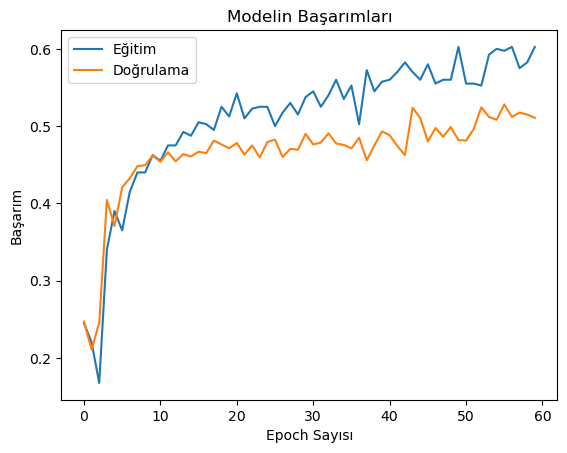

In [63]:
import matplotlib.pyplot as plt

history = model.history  # history = model.history: Modelin eğitim sırasında izlenen metriklerin (örneğin, doğruluk) geçmişini içeren "model.history" özelliğini "history" adlı bir değişkene atar. Bu geçmiş, her eğitim döngüsü (epoch) sonunda hesaplanan metrik değerleri içerir.

plt.plot(history.history["accuracy"])  # Bu satır, eğitim sırasında hesaplanan eğitim başarımlarını ("accuracy") çizdirir. Bu grafiğin x-ekseni, eğitim döngülerinin sayısını (epoch) ve y-ekseni, eğitim sırasında hesaplanan doğruluk değerlerini temsil eder.
plt.plot(history.history["val_accuracy"])  # Bu satır, eğitim sırasında hesaplanan doğrulama başarımlarını ("val_accuracy") çizdirir. Doğrulama başarımları, modelin eğitim verilerine ve doğrulama verilerine ne kadar iyi uyum sağladığını değerlendirmek için kullanılır.
plt.title("Modelin Başarımları")
plt.ylabel("Başarım")
plt.xlabel("Epoch Sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc="upper left")  # : Grafiğin sağ üst köşesinde bir açıklama (legend) ekler. "Eğitim" ve "Doğrulama" etiketleri, grafiğin hangi çizgileri temsil ettiğini belirtir.
plt.show()


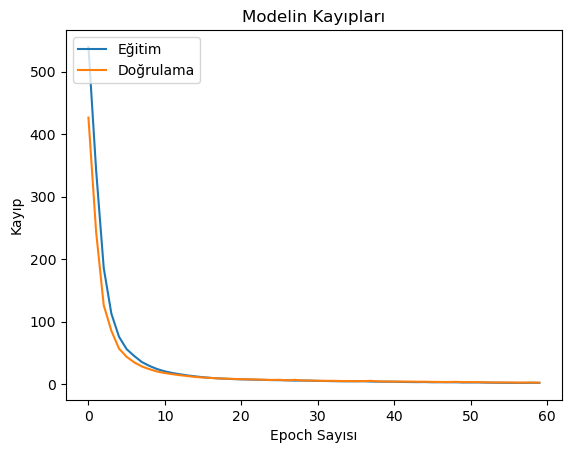

In [64]:
plt.plot(history.history["loss"])  # Bu satır, eğitim sırasında hesaplanan eğitim kayıplarını ("loss") çizdirir. Kayıp, modelin eğitim verilerine ne kadar iyi uyum sağladığını ve tahminlerinin ne kadar doğru veya yanlış olduğunu ölçer. Eğitim kaybı, her eğitim döngüsü (epoch) sonunda hesaplanır ve grafiğin x-ekseni, eğitim döngülerinin sayısını temsil eder.
plt.plot(history.history["val_loss"])  # Bu satır, eğitim sırasında hesaplanan doğrulama kayıplarını ("val_loss") çizdirir. Doğrulama kaybı, modelin eğitim verilerine ve doğrulama verilerine ne kadar iyi uyum sağladığını değerlendirmek için kullanılır. Doğrulama kaybı, aşırı uydurmayı (overfitting) veya underfitting'i (aşırı uyumsuzluk) değerlendirmek için önemlidir.
plt.title("Modelin Kayıpları") # 
plt.ylabel("Kayıp")
plt.xlabel("Epoch Sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc="upper left")  #  Grafiğin sağ üst köşesinde bir açıklama (legend) ekler. "Eğitim" ve "Doğrulama" etiketleri, grafiğin hangi çizgileri temsil ettiğini belirtir.
plt.show()